# Plot adjusted gene expression similarity over distance


In [1]:
""" Define location of AHBA data.
    AHBA data can be downloaded from the Allen Human Brain Atlas as six zip files.
    The files should then be unzipped into six separate subdirectories to avoid overwriting identically-named data.
    The main and subdirectories used for this project are defined below.
    """

# AHBA-specific data download and unzip location
ahba_source_dir = "/home/mike/ahba_raw"
donors = ["H0351_2001", "H0351_2002", "H0351_1009", "H0351_1012", "H0351_1015", "H0351_1016", ]

# Richiardi, et al. supplemental data download location
richiardi_supplement_dir = "/home/mike/Dropbox/_papers/gene expression/2015 Richiardi - Supplemental data"
richiardi_probe_file = "Richiardi_Data_File_S2 - 16906 probes and genes.xlsx"
richiardi_sample_file = "Richiardi_Data_File_S1 - 1777 samples.xlsx"


In [2]:
""" Load AHBA data as defined by Richardi. """

import pickle
import pandas as pd

# Load brain- and batch-adjusted expression values as residuals
#   requires that the load_and_adjust...ipynb has been run to generate it.
df_residuals = pd.read_csv("brain_and_batch_adjusted_residuals.csv", header=0, index_col=0)

print("Loaded [{:,} x {:,}] residual matrix.".format(
    df_residuals.shape[0], df_residuals.shape[1],
))


Loaded [16,906 x 1,777] residual matrix.


In [3]:
""" Load original AHBA sample data, and combine it into a single dataframe. """

import os
import pandas as pd


sample_dataframes = []
for donor in donors:
    print("{}:".format(donor))
    
    samples = pd.read_csv(os.path.join(ahba_source_dir, donor, "SampleAnnot.csv"), header=0, index_col=None, )
    print("    {:,} samples from {}".format(len(samples), donor))

    sample_dataframes.append(samples)

samples = pd.concat(sample_dataframes, axis=0).set_index('well_id')


H0351_2001:
    946 samples from H0351_2001
H0351_2002:
    893 samples from H0351_2002
H0351_1009:
    363 samples from H0351_1009
H0351_1012:
    529 samples from H0351_1012
H0351_1015:
    470 samples from H0351_1015
H0351_1016:
    501 samples from H0351_1016


In [4]:
""" View dataframe to ensure expected behavior. """

samples


,structure_id,slab_num,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
well_id,,,,,,,,,,,,
594,4077,22,CX,PCLa-i,"paracentral lobule, anterior part, right, infe...",37470,87,52,116,5.9,-27.7,49.7
2985,4323,11,CX,Cl,"claustrum, right",40517,66,92,63,29.2,17.0,-2.9
2801,4323,18,CX,Cl,"claustrum, right",41516,66,81,104,28.2,-22.8,16.8
2273,4440,18,CX,LGd,"dorsal lateral geniculate nucleus, left",41473,116,94,101,-24.6,-24.6,1.3
2785,4266,17,CX,CA4,"CA4 field, right",41142,63,104,106,31.1,-31.3,-7.3
...,...,...,...,...,...,...,...,...,...,...,...,...
159439039,4342,7,CX,BLA,"basolateral nucleus, left",147057074,112,127,94,-21.0,-3.0,-18.0
159438991,4785,64,CB,Glo,"globose nucleus, left",156978055,93,139,156,-2.0,-65.0,-30.0
159438975,4783,64,CB,Emb,"emboliform nucleus, left",156978968,93,136,153,-2.0,-62.0,-27.0


In [5]:
""" Use sample x,y,z coordinates to build a distance matrix. """

from scipy.spatial import distance_matrix


distances = pd.DataFrame(
    data=distance_matrix(samples[['mni_x', 'mni_y', 'mni_z', ]], samples[['mni_x', 'mni_y', 'mni_z', ]]),
    index=samples.index.astype(str), columns=samples.index.astype(str),
)

# Take a look
distances


well_id,594,2985,2801,2273,2785,2793,2795,2787,2874,2858,...,159438945,159439119,159439103,159439087,159439071,159439039,159438991,159438975,159438959,159438943
well_id,,,,,,,,,,,,,,,,,,,,,
594,0.000000,72.854238,40.046348,57.292408,62.425956,62.309229,88.874856,84.291459,80.769858,69.603089,...,75.034592,72.502345,81.014752,72.056853,72.471995,76.921973,88.350382,84.390699,77.222989,89.387863
2985,72.854238,0.000000,44.419928,68.136921,48.537202,49.515048,89.054253,84.238293,74.684604,69.089869,...,50.809940,60.073705,60.541308,51.552401,56.636119,56.107486,91.825105,88.290713,88.104767,94.830639
2801,40.046348,44.419928,0.000000,55.057515,25.719059,25.881847,71.231524,63.476767,55.977674,59.482434,...,58.900934,64.477283,68.199120,58.169752,61.991290,63.432799,69.879325,66.084189,61.810355,74.187061
2273,57.292408,68.136921,55.057515,0.000000,56.756850,56.853672,49.467767,52.389789,51.018722,15.487091,...,30.515734,24.495102,31.048510,27.539245,25.416727,29.189210,55.880319,52.061598,49.351900,51.873018
2785,62.425956,48.537202,25.719059,56.756850,0.000000,1.019804,54.643755,45.221787,35.944541,54.232370,...,55.141545,64.682223,64.310108,56.208451,61.235529,60.247739,52.407919,49.256370,47.742958,58.670180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159439039,76.921973,56.107486,63.432799,29.189210,60.247739,60.759444,57.447454,60.893842,56.600177,24.810482,...,6.000000,10.000000,5.000000,5.656854,6.324555,0.000000,65.946948,62.633857,63.890531,62.817195
159438991,88.350382,91.825105,69.879325,55.880319,52.407919,51.858558,11.126994,7.775603,18.198352,45.831867,...,64.474801,69.778220,66.738295,65.764732,67.889616,65.946948,0.000000,4.242641,12.041595,10.049876
159438975,84.390699,88.290713,66.084189,52.061598,49.256370,48.720735,10.574025,5.573150,15.741029,42.376409,...,61.081912,66.294796,63.608176,62.249498,64.397205,62.633857,4.242641,0.000000,9.219544,10.630146


In [6]:
""" Standardize on a particular plot style for each combination. """

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def plot_by_dist(dist_vec, expr_vec):
    """ Return a figure and its axes. Axes are expr-v-dist and conn-v-dist. """
    
    # Treat data for inclusion in plots
    df = pd.DataFrame({'dist': dist_vec, 'expr': expr_vec, })
    df_binned = df.groupby(pd.cut(df.dist, range(0, int(max(dist_vec) + 9), 4))).median()
    dist_bin_mids = [float(x) for x in range(2, int(max(dist_vec)), 16)]
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(7, 5))

    sns.regplot(x='dist', y='expr', data=df[df['dist'] >= 16.0], ci=None, ax=ax,
                line_kws={'color': 'dodgerblue'}, scatter_kws={'color': 'lightskyblue', 's': 1, 'alpha': 0.2})
    sns.regplot(x='dist', y='expr', data=df[df['dist'] < 16.0], ci=None, ax=ax,
                line_kws={'color': 'firebrick'}, scatter_kws={'color': 'salmon', 's': 1, 'alpha': 0.2})
    sns.lineplot(x='dist', y='expr', data=df_binned, color='black', marker="s", alpha=0.3, ax=ax)
    ax.set_title("")
    ax.set_ylabel("tissue-tissue similarity")
    ax.set_ylim(bottom=-0.60, top=0.60)
    ax.set_xlabel("edge distance (mm)")
    ax.set_xlim(left=0.0, right=168.0)
    ax.set_xticks(dist_bin_mids)
    ax.set_xticklabels([str(int(x)) for x in dist_bin_mids])
    
    return fig, ax


1777 samples overlap 1777 from expression residuals and 3702 from distance.


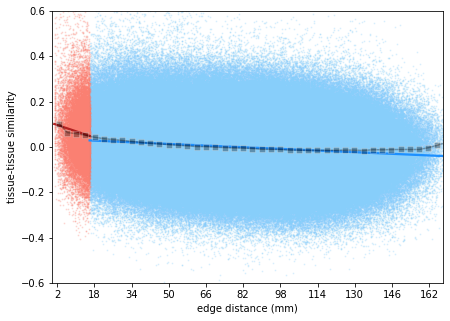

In [8]:
""" Build a distance matrix to match each expr-conn pair. """

import numpy as np


overlapping_samples = [well_id for well_id in df_residuals.columns if well_id in distances.columns]

print("{} samples overlap {} from expression residuals and {} from distance.".format(
    len(overlapping_samples), len(df_residuals.columns), len(distances.columns)
))

resid_df = df_residuals.loc[:, overlapping_samples]
resid_mat = np.corrcoef(resid_df, rowvar=False)
resid_vec = resid_mat[np.tril_indices_from(resid_mat, k=-1)]

dist_df = distances.reindex(overlapping_samples)[overlapping_samples]
dist_mat = dist_df.values
dist_vec = dist_mat[np.tril_indices(n=dist_mat.shape[0], k=-1)]

f, a = plot_by_dist(dist_vec, resid_vec)
f.savefig("resid_by_distance.png")


----

## Code below for debugging, experimentation, etc. and can be safely ignored

----